# Using KNN for regression tasks

In [14]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Training data

In [15]:
X, y = fetch_california_housing(return_X_y = True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

As we have seen earlier, the feature scales for this dataset varies widely. Since KNN involves distance compuations, it is crucial to convert them to similar scales.

## Model building

In [17]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=2))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6767822465759739


## Model selection and evaluation

### Manual HPT with cross validation

In [18]:
rmse_val = []
for k in range(1, 31):
    pipe = Pipeline([('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=k))])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    error = mean_squared_error(y_test, y_pred, squared=False)
    rmse_val.append(error)


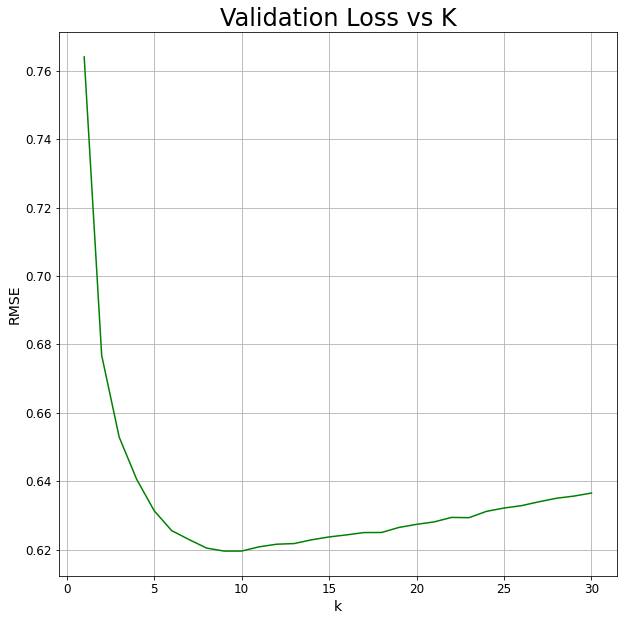

In [19]:
plt.figure(figsize=(10, 10))

plt.plot(range(1, len(rmse_val) + 1), rmse_val, color='green')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.grid('True')

plt.title("Validation Loss vs K", fontsize=24)
plt.show()

In [20]:
print("Lowest RMSE value comes from k = {}".format(np.argmin(rmse_val) + 1))

Lowest RMSE value comes from k = 9


### HPT with `GridSearchCV`

In [21]:
param_grid = {'knn__n_neighbors': list(range(1, 31))}

pipe = Pipeline([('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor())])

grid_search = GridSearchCV(estimator=pipe,
                            param_grid=param_grid,
                            cv=10, n_jobs=-1,
                            return_train_score=True)

grid_search.fit(X_train, y_train)

reg_knn = grid_search.best_estimator_
print(reg_knn)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


In [23]:
pred = reg_knn.predict(X_test)
error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6365126933355182


## Polynomial features

In [25]:
param_grid = {'poly__degree': list(range(1,4)),
              'knn__n_neighbors': list(range(6, 12))}

pipe = Pipeline([('poly', PolynomialFeatures()),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor())])

grid_search = GridSearchCV(estimator=pipe,
                            param_grid=param_grid,
                            cv=10, n_jobs=-1,
                            return_train_score=True)

grid_search.fit(X_train, y_train)

reg_knn = grid_search.best_estimator_
print(reg_knn)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


In [26]:
pred = reg_knn.predict(X_test)
error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6365126933355182
